In [39]:
import matplotlib.pyplot as plt
import math
import random as rd
import numpy as np
import scipy
from scipy import integrate, stats
from typing import List


In [21]:
N = 100
xn = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
alpha = 0.05

a)

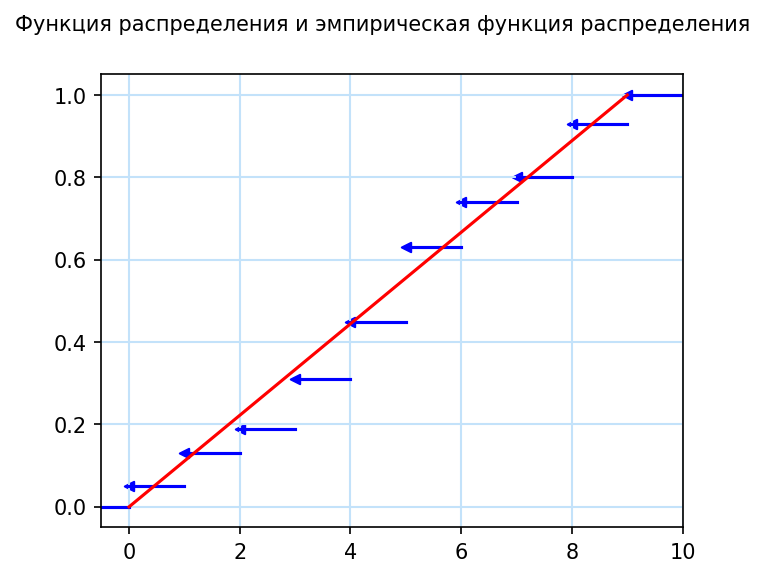

In [18]:
empirical = [xn[0]/N]

for i in range(1, len(xn)):
    empirical.append(empirical[-1] + xn[i] / N)
    
X = [i for i in range(len(xn))]
Y = empirical
#print(X, Y)

fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.grid(which='major', color = '#c3e2fa', linewidth = 1)       #для красоты
plt.xlim(-0.5, X[-1]+1)

for i in range(0,len(Y)-1):                                    #полуинтервалы
    plt.plot([X[i], X[i+1]],[Y[i], Y[i]], c="blue")
    plt.scatter(X[i], Y[i], color='blue', s=20, marker='<')
    
plt.plot([-1, X[0]],[0, 0], c="blue")                 #края
plt.plot([X[-1], X[-1]+1],[1, 1], c="blue")
plt.scatter(X[-1], 1, color='blue', s=20, marker='<')

plt.plot([0, 9],[0, 1], c="red")   

fig.suptitle('Функция распределения и эмпирическая функция распределения', size=10) 

plt.show()

#[5, 8, 6, 12, 14, 18, 11, 6, 13, 7]

In [4]:
def F(x):
    return (x / 9) 

delta_wave = np.sqrt(N) * max([max([abs(Y[i] - F(X[i])), abs(Y[i] - F(X[i])) ]) for i in range(len(X) - 1)])
print('дельта с волной:', delta_wave)

дельта с волной: 1.4333333333333331


In [5]:
summ_k = 0

for k in range(1, 1000):
    summ_k += (-1)**k * np.exp(-2 * k ** (2) * delta_wave ** 2 ) 
p_value = -2*summ_k
print('p-value = ', p_value)

p-value =  0.0328518854385974


b)

ММП

In [6]:
def p(a, b, mean, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * (integrate.quad(lambda x: np.exp(-(x - mean)**2 / (2 * sigma**2)), a, b)[0])

def L(mean, sigma, xn):
    res = 1
    res = np.prod([p(i-0.5, i+0.5, mean, sigma)**xn[i] for i in  range(1, len(xn)-1)])
    res *= (p(-np.inf, 0.5, mean, sigma)**xn[0]) * (p(8.5, np.inf, mean, sigma) ** xn[9])
    return res

Ltmp = 0
maxL = 0
mean_maxL = 0
sigma_maxL = 0

for mean in np.linspace(0.1, 9, 100):
    for sigma in np.linspace(0.1, 10, 100):
        Ltmp = L(mean, sigma, xn)
        if (maxL < Ltmp):
            maxL = Ltmp
            mean_maxL = mean
            sigma_maxL = sigma
print(f'mean = {mean_maxL}, sigma = {sigma_maxL}')

mean = 4.774747474747475, sigma = 2.7


In [13]:
pn = [p(-np.inf, 0.5, mean_maxL, sigma_maxL)]
pn += [p(i-0.5, i+0.5, mean_maxL, sigma_maxL) for i in  range(1, len(xn)-1)]
pn.append(p(8.5, np.inf, mean_maxL, sigma_maxL))
#print(pn)
print("сумма вероятностей: ", sum(pn))

deltaw2 = sum([((xn[i] - N * pn[i])**2)/(N * pn[i]) for i in range(10)])

print("оценка дельты: ", deltaw2) 


сумма вероятностей:  1.0
оценка дельты:  9.82823531196571


Колмогоров+bootstrap

In [8]:
delta2 = 10 * 6 / 100
deltas2 = []
for i in range(10000):
    xn_ = np.random.normal(4.77, 2.51, N)
    for j in range(N):
        xn_[j] = round(xn_[j])
    xn__ = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for j in range(N):
        if (int(xn_[j]) >= 0)and(int(xn_[j]) < 10):
            xn__[int(xn_[j])] += 1
    sup = 0
    for j in range(10):
        if sup < abs(xn__[j] - xn[j]):
            sup = abs(xn__[j] - xn[j])
    delta_ = 10 * sup / N 
    deltas2.append(delta_)
deltas2.sort()
k = 0
for elem in deltas2:
    if elem < delta2:
        k += 1
print(k)
print(f'p-value = {1 - (k / 10000)}')

954
p-value = 0.9046
